In [1]:
import pandas as pd
data = pd.read_csv("data.csv") 

In [2]:
import numpy as np
data_p=np.zeros((105*10,13))
# data_clean=np.array(data)
# data_clean=np.delete(data_clean,[10,33,36,37,43,55,64,72,87,114],0)
data_clean=np.array(data)
data_clean[np.where(data_clean==' ')]=np.nan
for i in range (0,105):
    data_p[i*10:i*10+10,0]=data_clean[i,0] #ID
    data_p[i*10:i*10+10,1]=data_clean[i,1:11] #time
    data_p[i*10:i*10+10,2]=data_clean[i,11:21] #choice
    data_p[i*10:i*10+10,3]=data_clean[i,21:31] #familarity
    data_p[i*10:i*10+10,4]=data_clean[i,31] #stress
    data_p[i*10:i*10+10,5]=data_clean[i,32] #tired
    data_p[i*10:i*10+10,6]=data_clean[i,33] #pay off
    data_p[i*10:i*10+10,7]=data_clean[i,34] #risk
    data_p[i*10:i*10+10,8]=data_clean[i,35] #bounce 4
    data_p[i*10:i*10+10,9]=data_clean[i,36] #bounce 3
    data_p[i*10:i*10+10,10]=data_clean[i,37] #choice 4 include 3?
    data_p[i*10:i*10+10,11]=data_clean[i,38] #choice 3
    data_p[i*10:i*10+10,12]=data_clean[i,39] #delay

In [22]:
y=data_p[np.where(data_p[:,3]==1),1]
y=y[~np.isnan(y)]

In [4]:
y.mean()

746.9362255813953

In [5]:
y.std()

500.47255173221646

In [6]:
def pdf(x, mu=0.0, sigma=1.0):
    x = (x - mu) / sigma
    return np.exp(-x*x/2.0) / np.sqrt(2.0*np.pi) / sigma

In [24]:
x=np.linspace(0, 4000, 1000)

(array([ 97., 156., 101.,  39.,  17.,  11.,   5.,   1.,   0.,   3.]),
 array([  56.298 ,  400.5274,  744.7568, 1088.9862, 1433.2156, 1777.445 ,
        2121.6744, 2465.9038, 2810.1332, 3154.3626, 3498.592 ]),
 <a list of 10 Patch objects>)

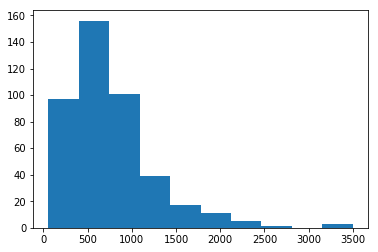

In [26]:
plt.hist(y)

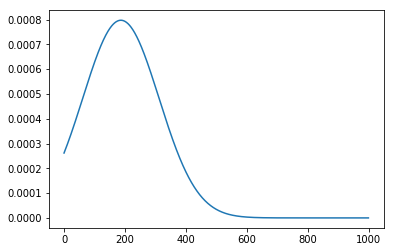

In [25]:
import matplotlib.pyplot as plt
plt.plot(pdf(x,y.mean(),y.std()))

In [17]:
import random
y=random.sample(pdf(x,y.mean(),y.std())**2,430)

In [20]:
y

[4.770578753778992e-09,
 4.0124580432610236e-22,
 3.4513794604881786e-09,
 5.885564999217894e-09,
 5.313879365177828e-16,
 2.430982764668555e-12,
 4.2627097654023384e-08,
 2.7802531219102436e-17,
 2.2430226156324121e-07,
 3.255987268997304e-08,
 2.099058059137472e-07,
 3.2790276068794595e-23,
 3.674264129146481e-11,
 5.504653047822114e-24,
 1.4636175004729744e-11,
 2.5813999060372356e-11,
 2.9476044435869153e-16,
 3.459885946377559e-07,
 3.323870101428987e-11,
 6.34612281464804e-07,
 1.6711350111225218e-07,
 3.2171818091731962e-18,
 2.0507032416843626e-12,
 7.354568549865424e-08,
 1.8767266388875365e-14,
 1.1790245292334818e-15,
 1.5358391281975983e-14,
 1.173528561994732e-14,
 9.193790257068277e-18,
 3.0306559890066315e-07,
 2.6006226488334516e-08,
 1.8598071228270669e-07,
 1.9421056354414863e-15,
 8.660743403626406e-08,
 3.7121158115626335e-09,
 5.855336942350049e-10,
 7.808141797721518e-15,
 1.2905527281097348e-10,
 3.1849472282577213e-14,
 1.011261313504033e-07,
 2.31884547721857e-

In [27]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

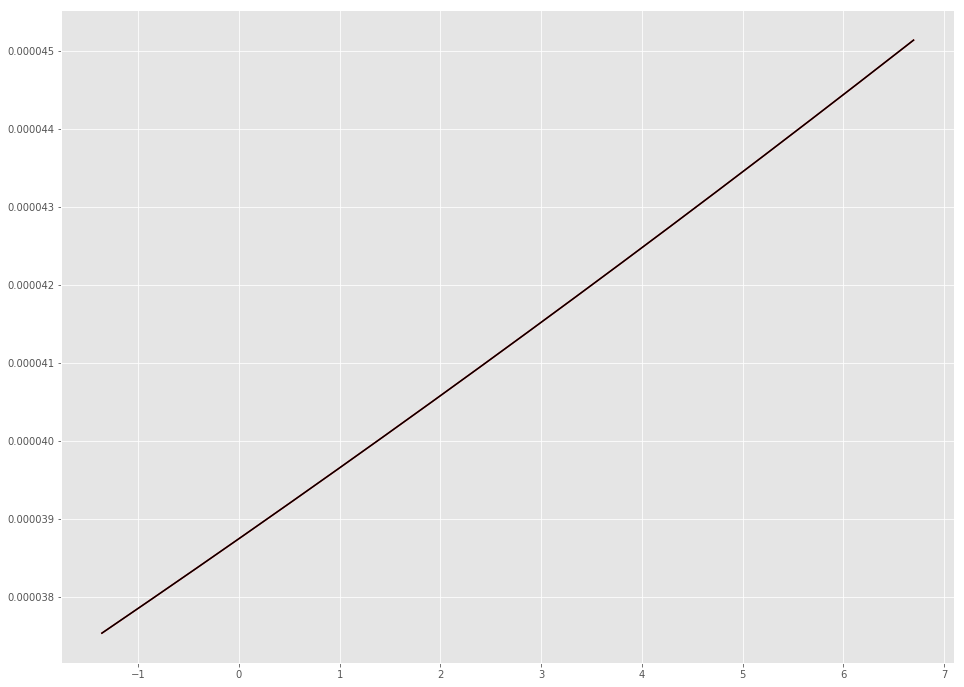

In [38]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
c = -0.15419966666313223
mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')
x = np.linspace(genextreme.ppf(0.01, c),
                 genextreme.ppf(0.99, c), 430)
#ax.plot(x, genextreme.pdf(x, c, 511.7228387990196, 312.7722836897374),
#        'r-', lw=5, alpha=0.6, label='genextreme pdf')
ax.plot(x, genextreme.pdf(x, c, 511.7228387990196, 312.7722836897374),
        'r-', label='genextreme pdf')
rv = genextreme(-0.15419966666313223, 511.7228387990196, 312.7722836897374)
ax.plot(x, rv.pdf(x), 'k-', label='frozen pdf')

In [35]:
rv = genextreme(-0.15419966666313223, 511.7228387990196, 312.7722836897374)

In [37]:
ax.plot(x, rv.pdf(x), 'k-', label='frozen pdf')

In [39]:
r = genextreme.rvs(-0.15419966666313223, 511.7228387990196, 312.7722836897374, size=1000)

(array([187., 497., 213.,  56.,  25.,  13.,   2.,   5.,   1.,   1.]),
 array([-126.30390822,  367.28836946,  860.88064713, 1354.47292481,
        1848.06520249, 2341.65748017, 2835.24975785, 3328.84203553,
        3822.43431321, 4316.02659089, 4809.61886857]),
 <a list of 10 Patch objects>)

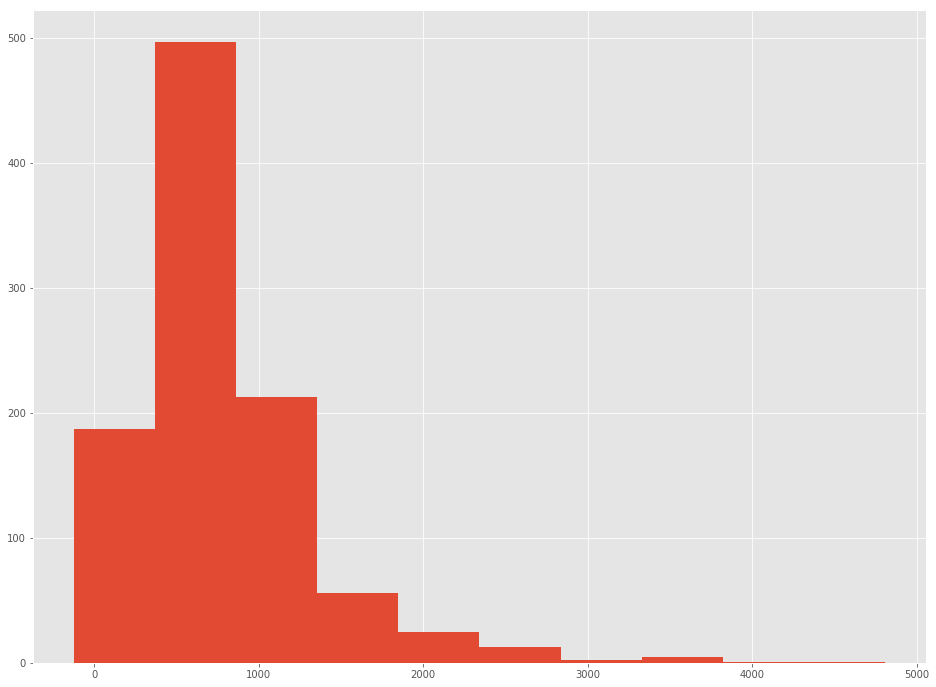

In [40]:
plt.hist(r)

In [41]:
y=data_p[np.where(data_p[:,3]==2),1]
y=y[~np.isnan(y)]

(array([61., 74., 48., 27.,  6.,  7.,  3.,  2.,  3.,  1.]),
 array([  43.284 ,  315.3936,  587.5032,  859.6128, 1131.7224, 1403.832 ,
        1675.9416, 1948.0512, 2220.1608, 2492.2704, 2764.38  ]),
 <a list of 10 Patch objects>)

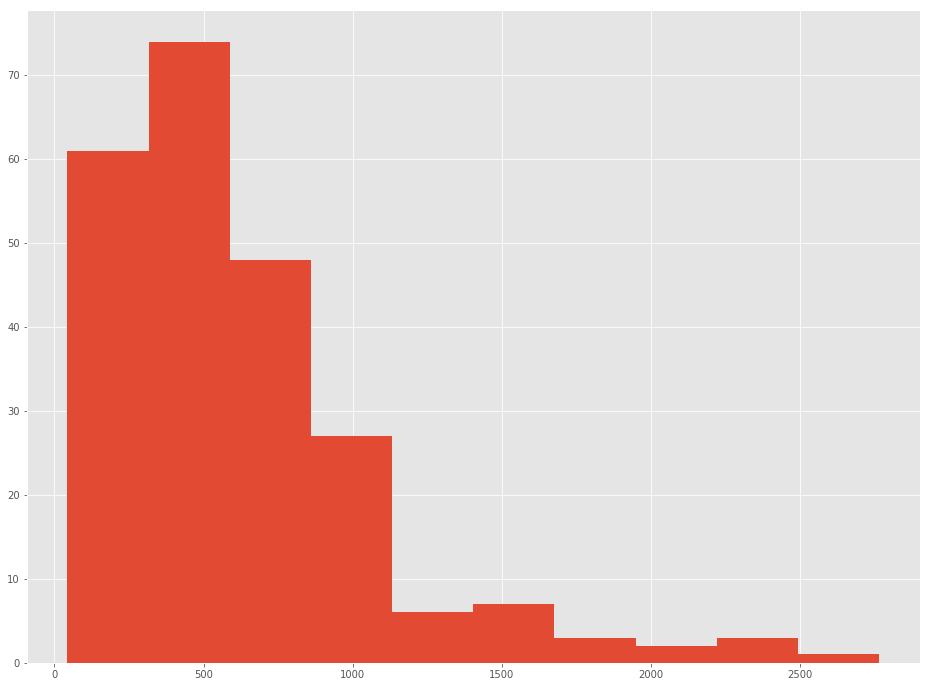

In [47]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
#     DISTRIBUTIONS = [        
#         st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
#         st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
#         st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
#         st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
#         st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
#         st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
#         st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
#         st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
#         st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
#         st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
#     ]
    DISTRIBUTIONS = [st.genextreme]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf

# # Load data from statsmodels datasets
# data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# # Plot for comparison
# plt.figure(figsize=(12,8))
# ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# # Save plot limits
# dataYLim = ax.get_ylim()

# # Find best fit distribution
# best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
# best_dist = getattr(st, best_fit_name)

# # Update plots
# ax.set_ylim(dataYLim)
# ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
# ax.set_xlabel(u'Temp (°C)')
# ax.set_ylabel('Frequency')

# # Make PDF with best params 
# pdf = make_pdf(best_dist, best_fit_params)

# # Display
# plt.figure(figsize=(12,8))
# ax = pdf.plot(lw=2, label='PDF', legend=True)
# data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

# param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
# param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
# dist_str = '{}({})'.format(best_fit_name, param_str)

# ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
# ax.set_xlabel(u'Temp. (°C)')
# ax.set_ylabel('Frequency')

In [48]:
best_fit_distribution(y, bins=200, ax=None)

('genextreme', (-0.0020499738164719283, 254.90107426899056, 472.0746198656577))

In [49]:
r = genextreme.rvs(-0.0020499738164719283, 254.90107426899056, 472.0746198656577, size=1000)

(array([131., 429., 279., 107.,  46.,   6.,   1.,   0.,   0.,   1.]),
 array([-685.1900753 ,  -90.90868655,  503.3727022 , 1097.65409095,
        1691.93547971, 2286.21686846, 2880.49825721, 3474.77964596,
        4069.06103472, 4663.34242347, 5257.62381222]),
 <a list of 10 Patch objects>)

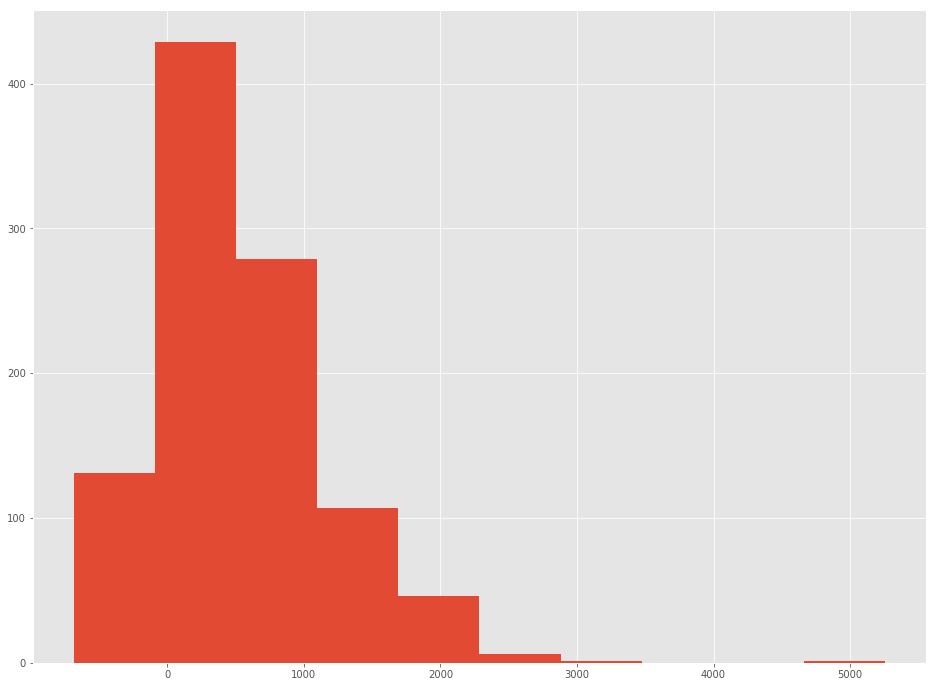

In [51]:
plt.hist(r)

In [53]:
y=data_p[np.where(data_p[:,3]==3),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('genextreme', (-4.317540804182535, 22.630967661278873, 6.074777703546836))

(array([80., 82., 28.,  5.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  21.225 ,  393.2609,  765.2968, 1137.3327, 1509.3686, 1881.4045,
        2253.4404, 2625.4763, 2997.5122, 3369.5481, 3741.584 ]),
 <a list of 10 Patch objects>)

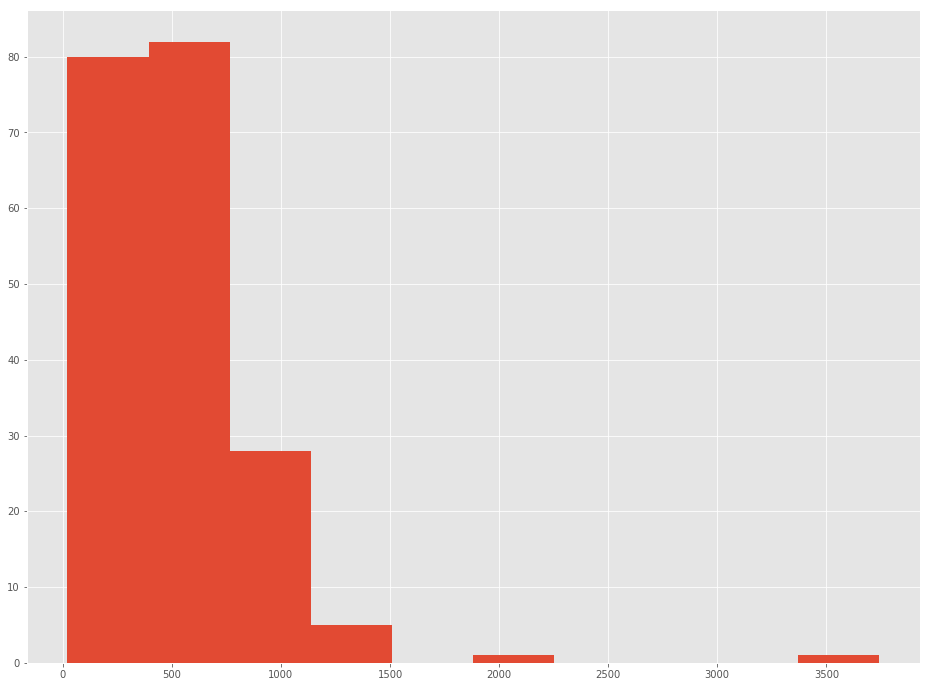

In [57]:
plt.hist(y)
#plt.hist(genextreme.rvs(-4.317540804182535, 22.630967661278873, 6.074777703546836, size=1000))

In [58]:
y=data_p[np.where(data_p[:,3]==4),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('genextreme', (-4.927652534609018, 57.5193188659582, 2.9339804606631352))

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1., 996.]),
 array([-44608.61652449, -40141.94339902, -35675.27027354, -31208.59714807,
        -26741.92402259, -22275.25089712, -17808.57777164, -13341.90464617,
         -8875.23152069,  -4408.55839522,     58.11473026]),
 <a list of 10 Patch objects>)

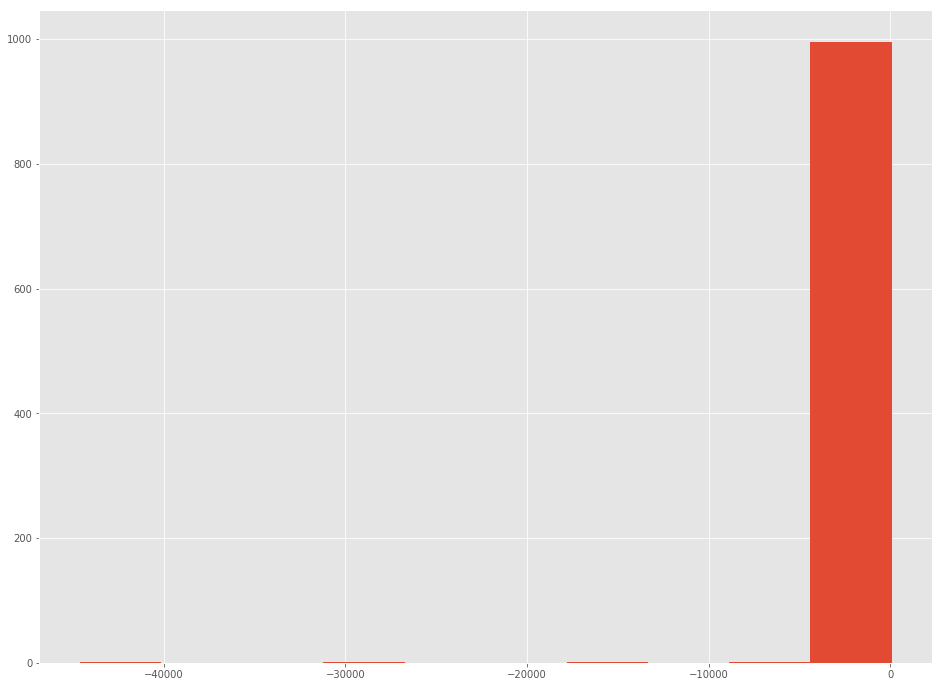

In [60]:
plt.hist(genextreme.rvs(4.927652534609018, 57.5193188659582, 2.9339804606631352, size=1000))

In [61]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    #DISTRIBUTIONS = [st.genextreme]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf

# # Load data from statsmodels datasets
# data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# # Plot for comparison
# plt.figure(figsize=(12,8))
# ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# # Save plot limits
# dataYLim = ax.get_ylim()

# # Find best fit distribution
# best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
# best_dist = getattr(st, best_fit_name)

# # Update plots
# ax.set_ylim(dataYLim)
# ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
# ax.set_xlabel(u'Temp (°C)')
# ax.set_ylabel('Frequency')

# # Make PDF with best params 
# pdf = make_pdf(best_dist, best_fit_params)

# # Display
# plt.figure(figsize=(12,8))
# ax = pdf.plot(lw=2, label='PDF', legend=True)
# data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

# param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
# param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
# dist_str = '{}({})'.format(best_fit_name, param_str)

# ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
# ax.set_xlabel(u'Temp. (°C)')
# ax.set_ylabel('Frequency')


In [62]:
y=data_p[:,1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('burr',
 (3.313334200376927,
  0.5292050068682177,
  0.7230352074341084,
  725.8158336063593))

In [ ]:
r = genextreme.rvs(-0.15419966666313223, 511.7228387990196, 312.7722836897374, size=1000)
r = genextreme.rvs(-0.0020499738164719283, 254.90107426899056, 472.0746198656577, size=1000)
r=genextreme.rvs(-4.317540804182535, 22.630967661278873, 6.074777703546836, size=1000)

In [63]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
#     DISTRIBUTIONS = [        
#         st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
#         st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
#         st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
#         st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
#         st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
#         st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
#         st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
#         st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
#         st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
#         st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
#     ]
    DISTRIBUTIONS = [st.burr]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf

# # Load data from statsmodels datasets
# data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# # Plot for comparison
# plt.figure(figsize=(12,8))
# ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# # Save plot limits
# dataYLim = ax.get_ylim()

# # Find best fit distribution
# best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
# best_dist = getattr(st, best_fit_name)

# # Update plots
# ax.set_ylim(dataYLim)
# ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
# ax.set_xlabel(u'Temp (°C)')
# ax.set_ylabel('Frequency')

# # Make PDF with best params 
# pdf = make_pdf(best_dist, best_fit_params)

# # Display
# plt.figure(figsize=(12,8))
# ax = pdf.plot(lw=2, label='PDF', legend=True)
# data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

# param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
# param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
# dist_str = '{}({})'.format(best_fit_name, param_str)

# ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
# ax.set_xlabel(u'Temp. (°C)')
# ax.set_ylabel('Frequency')



In [65]:
y=data_p[np.where(data_p[:,3]==1),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('burr',
 (3.1963734941460253,
  0.6756158751301813,
  -5.541005126302264,
  770.0101084770896))

(array([437., 406., 100.,  34.,  13.,   5.,   3.,   1.,   0.,   1.]),
 array([  20.17676742,  578.4405637 , 1136.70435999, 1694.96815627,
        2253.23195255, 2811.49574884, 3369.75954512, 3928.0233414 ,
        4486.28713769, 5044.55093397, 5602.81473025]),
 <a list of 10 Patch objects>)

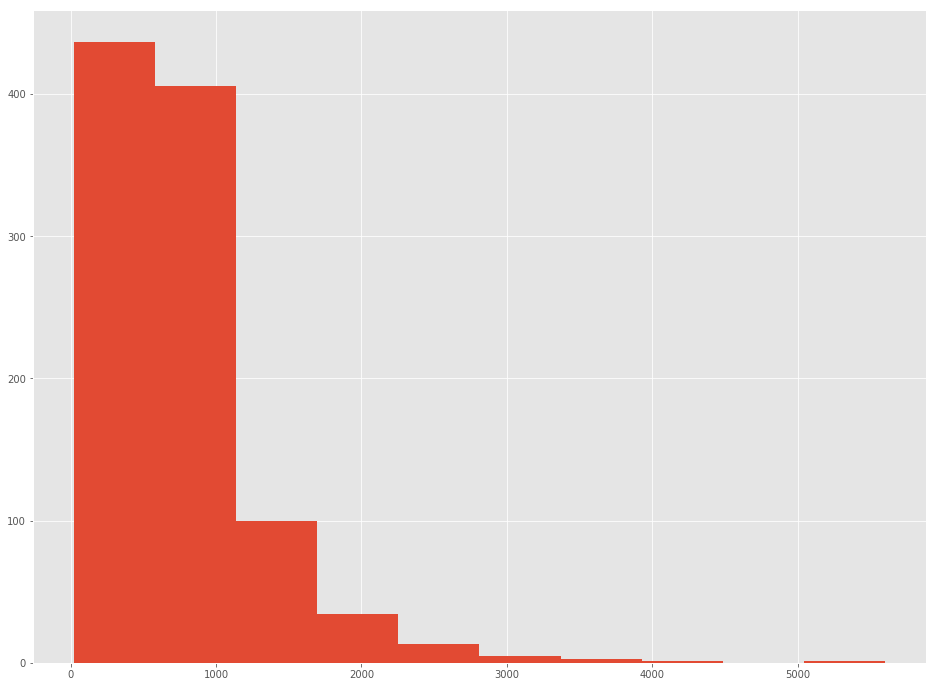

In [71]:
from scipy.stats import burr
#rv = burr(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896)
r = burr.rvs(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896, size=1000)
plt.hist(r)

In [73]:
y=data_p[np.where(data_p[:,3]==2),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('burr',
 (2.881819996766421,
  0.7423974676323387,
  -0.10643840038516461,
  600.8193288318848))

(array([876., 108.,  12.,   2.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([   21.12567175,  1069.42953905,  2117.73340635,  3166.03727364,
         4214.34114094,  5262.64500824,  6310.94887553,  7359.25274283,
         8407.55661013,  9455.86047742, 10504.16434472]),
 <a list of 10 Patch objects>)

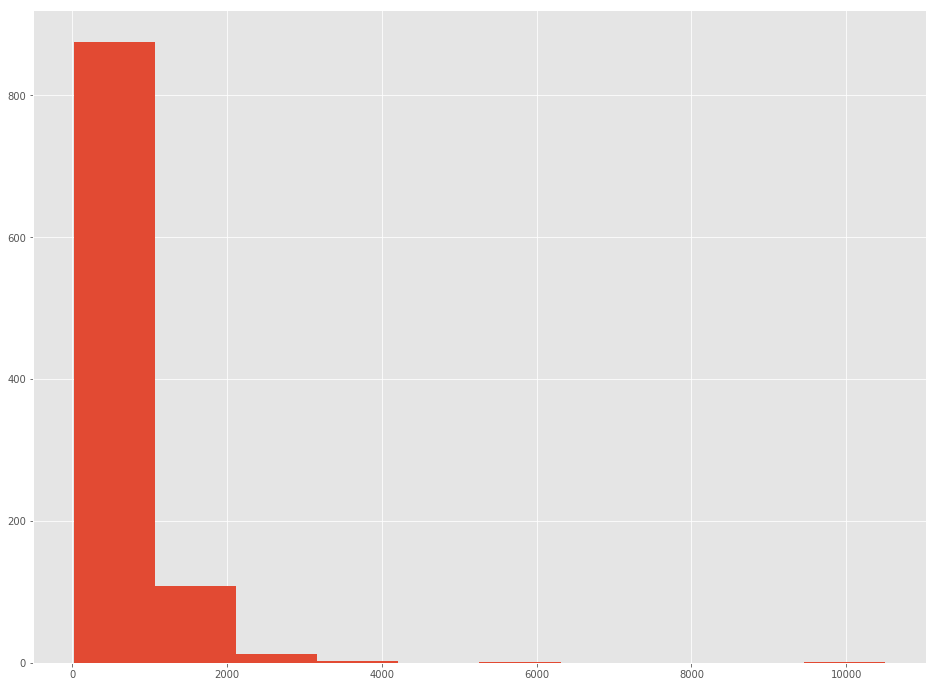

In [74]:
from scipy.stats import burr
#rv = burr(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896)
r = burr.rvs(2.881819996766421,0.7423974676323387,-0.10643840038516461,600.8193288318848, size=1000)
plt.hist(r)

In [75]:
y=data_p[np.where(data_p[:,3]==3),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('burr',
 (3.8823906071218754,
  0.39664109623209587,
  -4.321262183898044,
  666.6238719647567))

(array([213., 375., 237., 103.,  44.,  13.,   9.,   3.,   2.,   1.]),
 array([-1.89648660e-01,  2.49147631e+02,  4.98484910e+02,  7.47822190e+02,
         9.97159469e+02,  1.24649675e+03,  1.49583403e+03,  1.74517131e+03,
         1.99450859e+03,  2.24384587e+03,  2.49318315e+03]),
 <a list of 10 Patch objects>)

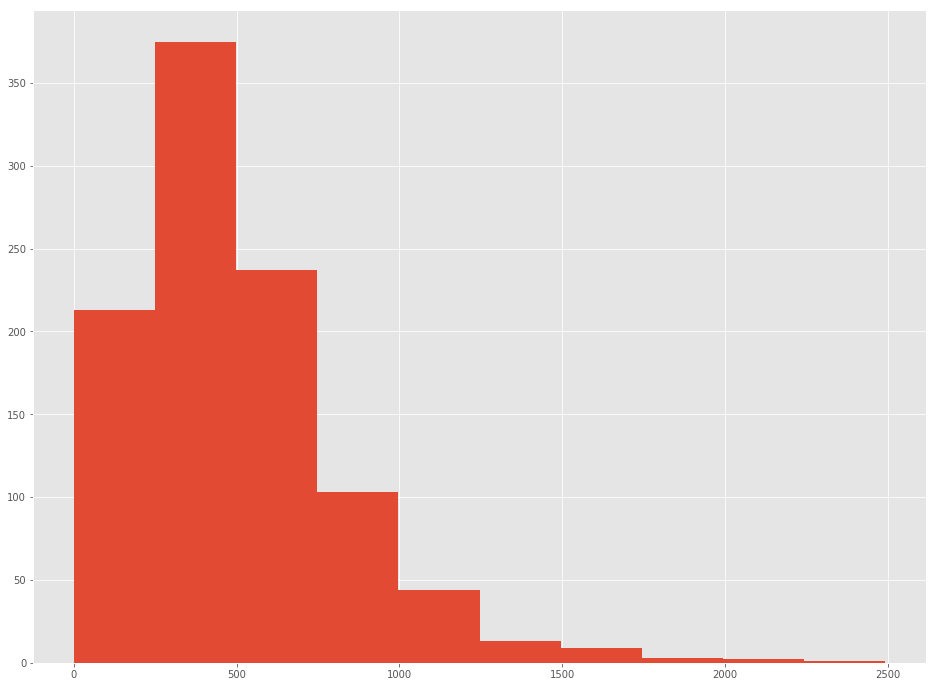

In [76]:
from scipy.stats import burr
#rv = burr(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896)
r = burr.rvs(3.8823906071218754,0.39664109623209587,-4.321262183898044,666.6238719647567, size=1000)
plt.hist(r)

In [77]:
y=data_p[np.where(data_p[:,3]==4),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('burr',
 (6.1030943196528735,
  0.21404856140204834,
  -3.2134669690041697,
  743.8724160581987))

(array([181., 249., 294., 175.,  65.,  22.,  10.,   2.,   1.,   1.]),
 array([7.32368211e-01, 1.98269665e+02, 3.95806961e+02, 5.93344258e+02,
        7.90881554e+02, 9.88418850e+02, 1.18595615e+03, 1.38349344e+03,
        1.58103074e+03, 1.77856804e+03, 1.97610533e+03]),
 <a list of 10 Patch objects>)

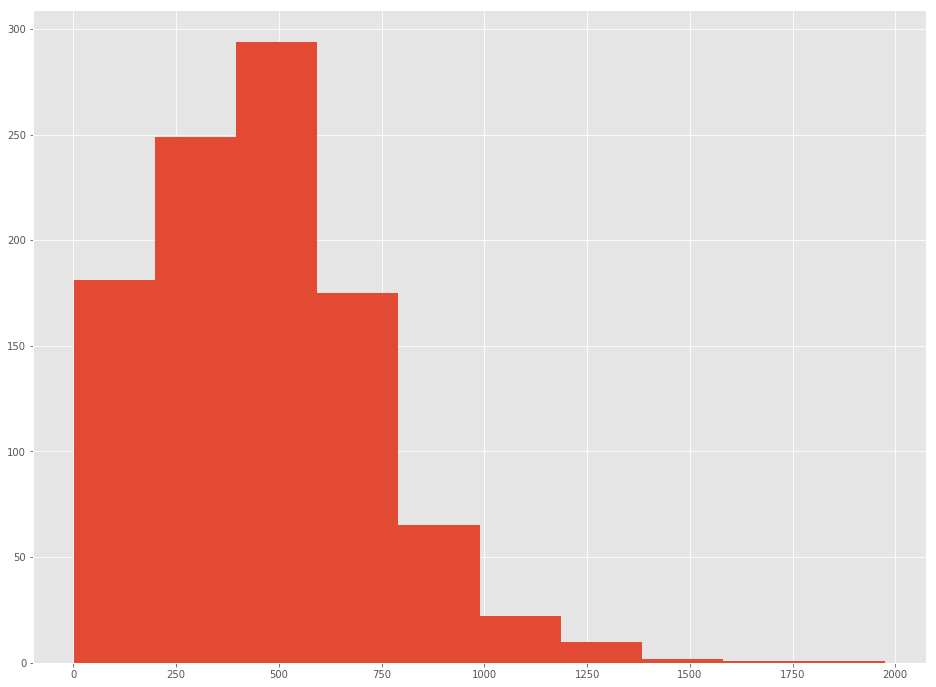

In [78]:
from scipy.stats import burr
#rv = burr(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896)
r = burr.rvs(6.1030943196528735,0.21404856140204834,-3.2134669690041697,743.8724160581987, size=1000)
plt.hist(r)

In [79]:
y=data_p[np.where(data_p[:,3]==0),1]
y=y[~np.isnan(y)]
best_fit_distribution(y, bins=200, ax=None)

('burr',
 (14.038027454242975,
  2088.291950538207,
  -6.573122747248534,
  398.27116774711067))

(array([170., 454., 235.,  97.,  32.,   7.,   1.,   1.,   2.,   1.]),
 array([ 583.55582946,  651.6416192 ,  719.72740893,  787.81319867,
         855.8989884 ,  923.98477814,  992.07056788, 1060.15635761,
        1128.24214735, 1196.32793708, 1264.41372682]),
 <a list of 10 Patch objects>)

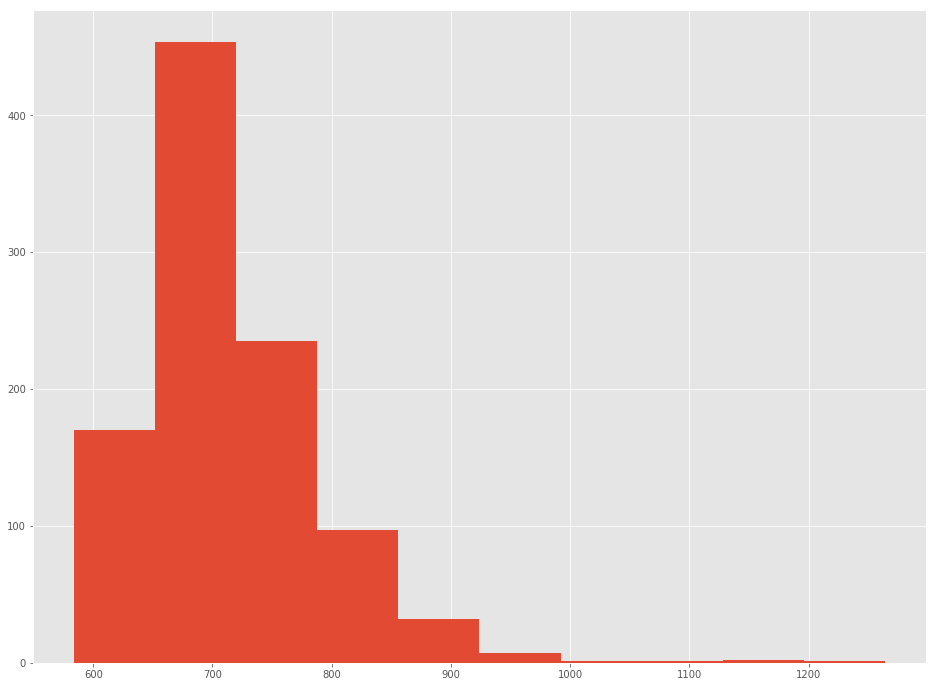

In [80]:
from scipy.stats import burr
#rv = burr(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896)
r = burr.rvs(14.038027454242975,2088.291950538207,-6.573122747248534,398.27116774711067, size=1000)
plt.hist(r)

In [ ]:
r = burr.rvs(14.038027454242975,2088.291950538207,-6.573122747248534,398.27116774711067, size=1000)
r = burr.rvs(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896, size=1000)
r=burr.rvs(2.881819996766421,0.7423974676323387,-0.10643840038516461,600.8193288318848, size=1000)
r = burr.rvs(3.8823906071218754,0.39664109623209587,-4.321262183898044,666.6238719647567, size=1000)
r = burr.rvs(6.1030943196528735,0.21404856140204834,-3.2134669690041697,743.8724160581987, size=1000)